## UFC Prediction Data

### Packages

In [1]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np

#Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Packages for datetime conversions
import time
from datetime import datetime as dt

#Machine Learning
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

### Data
- To access data: https://www.kaggle.com/mdabbert/ultimate-ufc-dataset

In [13]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head(2)

(5144, 145)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [12]:
pre_df = pd.read_csv('preprocessed_data.csv')
print(pre_df.shape)
pre_df.head(2)

(3592, 160)


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.2,6.0,0.2,0.0,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.6,9.1,11.8,7.3,...,0,0,1,0,0,0,0,0,1,0


In [10]:
raw_fighter_details_pd = pd.read_csv('raw_fighter_details.csv')
print(raw_fighter_details_pd.shape)
raw_fighter_details_pd.head(2)

(3313, 6)


,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN


In [11]:
raw_total_fight_pd = pd.read_csv('raw_total_fight_data.csv')
print(raw_total_fight_pd.shape)
raw_total_fight_pd.head(2)

(5144, 1)


,,,R_fighter;B_fighter;R_KD;B_KD;R_SIG_STR.;B_SIG_STR.;R_SIG_STR_pct;B_SIG_STR_pct;R_TOTAL_STR.;B_TOTAL_STR.;R_TD;B_TD;R_TD_pct;B_TD_pct;R_SUB_ATT;B_SUB_ATT;R_PASS;B_PASS;R_REV;B_REV;R_HEAD;B_HEAD;R_BODY;B_BODY;R_LEG;B_LEG;R_DISTANCE;B_DISTANCE;R_CLINCH;B_CLINCH;R_GROUND;B_GROUND;win_by;last_round;last_round_time;Format;Referee;date;location;Fight_type;Winner
Henry Cejudo;Marlon Moraes;0;0;90 of 171;57 of 119;52%;47%;99 of 182;59 of 121;1 of 4;0 of 2;25%;0%;1;0;1;0;0;0;73 of 150;35 of 89;13 of 16;7 of 8;4 of 5;15 of 22;45 of 118;54 of 116;19 of 23;2 of 2;26 of 30;1 of 1;KO/TKO;3;4:51;5 Rnd (5-5-5-5-5);Marc Goddard;June 08,2019;Chicago,Illinois,USA;UFC Bantamweight Title Bout;Henry Cejudo
Valentina Shevchenko;Jessica Eye;1;0;8 of 11;2 of 12;72%;16%;37 of 40;42 of 52;2 of 2;0 of 0;100%;0%;1;0;3;0;0;0;4 of 5;0 of 7;4 of 6;0 of 2;0 of 0;2 of 3;5 of 8;2 of 12;2 of 2;0 of 0;1 of 1;0 of 0;KO/TKO;2;0:26;5 Rnd (5-5-5-5-5);Robert Madrigal;June 08,2019;Chicago,Illinois,USA;UFC Women's Flyweight Title Bout;Valentin...


### Briefly describing general data:
- raw_total_fight_data.csv has unfiltered ata containing similar unlabeled data to the preprocessing_data.csv
- raw_fighter_details_pd and pre_df are two tables that are joined to make data.csv, but there is no primary key in the preprocessed_data.csv to join the too
- Therefore, I will be working with the main file, data.csv

### Next steps:
- Before we can work on the data, we need to clean it and make sure it has consistent values without throwing errors.
- We will ensure the datasets have no NA values
- We will create a new dataset that has filtered out the color of each fighter into the two rows to reduce the number of columns up to half

In [51]:
data = df.dropna(how='all')
print(("Pre-filter:{}; Post-filter:{}").format(df.shape, data.shape))

Pre-filter:(5144, 145); Post-filter:(5144, 145)


In [52]:
#Filter blue and red fighter columns into separate arrays
blue_fighter = []
red_fighter = []
for i in df.columns.values:
    if i[0] == 'B':
        blue_fighter.append(i)
    elif i[0] == 'R':
        red_fighter.append(i)
    else:
        blue_fighter.append(i)
        red_fighter.append(i)

In [53]:
blue_data = data[blue_fighter]
red_data = data[red_fighter]

In [54]:
new_blue_columns = ['fighter', 'date', 'location', 'Winner', 'title_bout', 'weight_class',
       'no_of_rounds', 'current_lose_streak', 'current_win_streak',
       'draw', 'avg_BODY_att', 'avg_BODY_landed', 'avg_CLINCH_att',
       'avg_CLINCH_landed', 'avg_DISTANCE_att', 'avg_DISTANCE_landed',
       'avg_GROUND_att', 'avg_GROUND_landed', 'avg_HEAD_att',
       'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att', 'avg_LEG_landed',
       'avg_PASS', 'avg_REV', 'avg_SIG_STR_att', 'avg_SIG_STR_landed',
       'avg_SIG_STR_pct', 'avg_SUB_ATT', 'avg_TD_att', 'avg_TD_landed',
       'avg_TD_pct', 'avg_TOTAL_STR_att', 'avg_TOTAL_STR_landed',
       'longest_win_streak', 'losses', 'avg_opp_BODY_att',
       'avg_opp_BODY_landed', 'avg_opp_CLINCH_att',
       'avg_opp_CLINCH_landed', 'avg_opp_DISTANCE_att',
       'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att',
       'avg_opp_HEAD_landed', 'avg_opp_KD', 'avg_opp_LEG_att',
       'avg_opp_LEG_landed', 'avg_opp_PASS', 'avg_opp_REV',
       'avg_opp_SIG_STR_att', 'avg_opp_SIG_STR_landed',
       'avg_opp_SIG_STR_pct', 'avg_opp_SUB_ATT', 'avg_opp_TD_att',
       'avg_opp_TD_landed', 'avg_opp_TD_pct', 'avg_opp_TOTAL_STR_att',
       'avg_opp_TOTAL_STR_landed', 'total_rounds_fought',
       'total_time_fought(seconds)', 'total_title_bouts',
       'win_by_Decision_Majority', 'win_by_Decision_Split',
       'win_by_Decision_Unanimous', 'win_by_KO/TKO', 'win_by_Submission',
       'win_by_TKO_Doctor_Stoppage', 'wins', 'Stance', 'Height_cms',
       'Reach_cms', 'Weight_lbs', 'age']

new_red_columns = ['fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout',
       'weight_class', 'no_of_rounds', 'current_lose_streak',
       'current_win_streak', 'draw', 'avg_BODY_att', 'avg_BODY_landed',
       'avg_CLINCH_att', 'avg_CLINCH_landed', 'avg_DISTANCE_att',
       'avg_DISTANCE_landed', 'avg_GROUND_att', 'avg_GROUND_landed',
       'avg_HEAD_att', 'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att',
       'avg_LEG_landed', 'avg_PASS', 'avg_REV', 'avg_SIG_STR_att',
       'avg_SIG_STR_landed', 'avg_SIG_STR_pct', 'avg_SUB_ATT',
       'avg_TD_att', 'avg_TD_landed', 'avg_TD_pct',
       'avg_TOTAL_STR_att', 'avg_TOTAL_STR_landed', 'longest_win_streak',
       'losses', 'avg_opp_BODY_att', 'avg_opp_BODY_landed',
       'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed',
       'avg_opp_DISTANCE_att', 'avg_opp_DISTANCE_landed',
       'avg_opp_GROUND_att', 'avg_opp_GROUND_landed', 'avg_opp_HEAD_att',
       'avg_opp_HEAD_landed', 'avg_opp_KD', 'avg_opp_LEG_att',
       'avg_opp_LEG_landed', 'avg_opp_PASS', 'avg_opp_REV',
       'avg_opp_SIG_STR_att', 'avg_opp_SIG_STR_landed',
       'avg_opp_SIG_STR_pct', 'avg_opp_SUB_ATT', 'avg_opp_TD_att',
       'avg_opp_TD_landed', 'avg_opp_TD_pct', 'avg_opp_TOTAL_STR_att',
       'avg_opp_TOTAL_STR_landed', 'total_rounds_fought',
       'total_time_fought(seconds)', 'total_title_bouts',
       'win_by_Decision_Majority', 'win_by_Decision_Split',
       'win_by_Decision_Unanimous', 'win_by_KO/TKO', 'win_by_Submission',
       'win_by_TKO_Doctor_Stoppage', 'wins', 'Stance', 'Height_cms',
       'Reach_cms', 'Weight_lbs', 'age']

In [55]:
blue_data.columns = new_blue_columns
red_data.columns = new_red_columns
try:
    blue_data['Referee'] = "empty"
except:
    print("error")

<ipython-input-55-5b57164dc88b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_data['Referee'] = "empty"


In [101]:
fighter_data = pd.concat([blue_data, red_data], axis = 0)
fighter_data.head(2)

,fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,...,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,Referee
0,Marlon Moraes,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,...,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0,empty
1,Jessica Eye,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,...,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0,empty


In [105]:
object_types = []
bool_types = []
num_types = []

for i in fighter_data.columns:
    if fighter_data[i].dtypes == object:
        object_types.append(i)
    elif fighter_data[i].dtypes == bool:
        bool_types.append(i)
    elif fighter_data[i].dtypes == int or fighter_data[i].dtypes == float:
        num_types.append(i)
        #fighter_data[i] = fighter_data[i].fillna(0, inplace=True)
        
fighter_data.fillna(0, inplace=True)

In [110]:
nulls = fighter_data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [109]:
fighter_data.head(5)

,fighter,date,location,Winner,title_bout,weight_class,no_of_rounds,current_lose_streak,current_win_streak,draw,...,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,Referee
0,Marlon Moraes,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,...,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0,empty
1,Jessica Eye,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,...,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0,empty
2,Donald Cerrone,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,...,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,36.0,empty
3,Petr Yan,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,...,2.0,0.0,0.0,4.0,Switch,170.18,170.18,135.0,26.0,empty
4,Blagoy Ivanov,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,Southpaw,180.34,185.42,250.0,32.0,empty


### Data Visualization
- Now, that we have the data filtered and ready to go, let's get a better understanding of it through visualization!

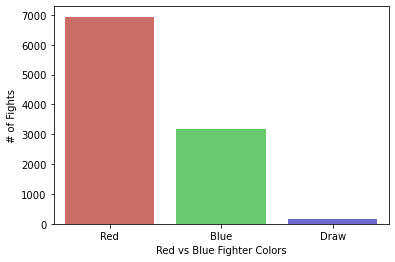

In [111]:
#Print out histogram looking at the relationship between Red and Blue fighters
colors = ["pale red","windows blue"]
sns.countplot(x = "Winner", data = fighter_data, palette ="hls")
plt.xlabel("Red vs Blue Fighter Colors")
plt.ylabel("# of Fights")
plt.show()
#plt.savefig('histogram.png', dpi=400)

fighter


KeyboardInterrupt: 

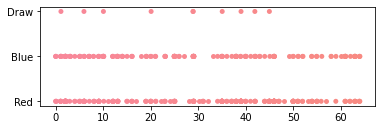

In [113]:
def graphStripPlot(y,x,data):
    plt.subplot(2,1,1)
    sns.stripplot(y=y, x=x, data = data)
    #plt.savefig('stripplot.png',dpi=400)

    # Display the plot
    plt.show()

    #sns.swarmplot(y=y,x=x,data=data)
    #plt.savefig('swarmplot.png', dpi=400)
    
#df_features_values = df_features.drop(['Winner', 'weight_class','B_fighter','R_fighter'], axis=1)
df_features_values = fighter_data
for i in df_features_values.columns.values:
    print(i)
    graphStripPlot('Winner',i, fighter_data)

In [114]:
fighter_data.corr(method = 'pearson').abs()

,title_bout,no_of_rounds,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms,Reach_cms,Weight_lbs,age
title_bout,1.000000,0.565275,0.133598,0.328779,NaN,0.018237,0.036163,0.030774,0.040976,0.005931,...,0.011690,0.107709,0.163324,0.063031,0.065858,0.154540,0.008360,0.031837,0.048724,0.011637
no_of_rounds,0.565275,1.000000,0.050353,0.326856,NaN,0.170653,0.179620,0.133894,0.137407,0.169740,...,0.099966,0.269353,0.321801,0.109358,0.079424,0.330979,0.018936,0.276902,0.042924,0.285675
current_lose_streak,0.133598,0.050353,1.000000,0.399471,NaN,0.122323,0.106047,0.112886,0.095588,0.158370,...,0.072978,0.028344,0.081037,0.039602,0.041284,0.079778,0.005087,0.069840,0.007780,0.163316
current_win_streak,0.328779,0.326856,0.399471,1.000000,NaN,0.198597,0.210486,0.162953,0.167297,0.178061,...,0.142112,0.335122,0.292977,0.244437,0.088578,0.398320,0.039234,0.116792,0.016325,0.070707
draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wins,0.154540,0.330979,0.079778,0.398320,NaN,0.244155,0.248520,0.196060,0.189323,0.259479,...,0.436608,0.777619,0.769141,0.581392,0.296124,1.000000,0.085249,0.219786,0.071555,0.329482
Height_cms,0.008360,0.018936,0.005087,0.039234,NaN,0.122280,0.094916,0.021110,0.010670,0.141402,...,0.064919,0.042999,0.177397,0.064091,0.025742,0.085249,1.000000,0.086615,0.687668,0.085285
Reach_cms,0.031837,0.276902,0.069840,0.116792,NaN,0.220103,0.218895,0.182471,0.184126,0.233271,...,0.101769,0.184632,0.175240,0.099773,0.047186,0.219786,0.086615,1.000000,0.117992,0.347187
Weight_lbs,0.048724,0.042924,0.007780,0.016325,NaN,0.214376,0.171851,0.051576,0.040274,0.240220,...,0.092946,0.081968,0.227094,0.008052,0.041074,0.071555,0.687668,0.117992,1.000000,0.010618


Top 10:
 avg_opp_HEAD_att      avg_opp_SIG_STR_att      0.988270
avg_HEAD_att          avg_SIG_STR_att          0.985744
avg_LEG_att           avg_LEG_landed           0.981752
avg_opp_LEG_att       avg_opp_LEG_landed       0.980248
avg_CLINCH_att        avg_CLINCH_landed        0.973595
avg_opp_DISTANCE_att  avg_opp_SIG_STR_att      0.973434
avg_GROUND_att        avg_GROUND_landed        0.971502
avg_opp_CLINCH_att    avg_opp_CLINCH_landed    0.970180
avg_BODY_att          avg_BODY_landed          0.967210
avg_opp_GROUND_att    avg_opp_GROUND_landed    0.967088
dtype: float64 
Bottom 10:
 avg_opp_TD_landed       total_title_bouts             0.001690
avg_opp_SIG_STR_landed  win_by_TKO_Doctor_Stoppage    0.001674
avg_SUB_ATT             avg_opp_DISTANCE_att          0.001196
avg_BODY_att            win_by_Decision_Majority      0.001057
avg_opp_REV             win_by_Decision_Majority      0.001022
avg_opp_PASS            win_by_Decision_Unanimous     0.000752
avg_opp_GROUND_att      w

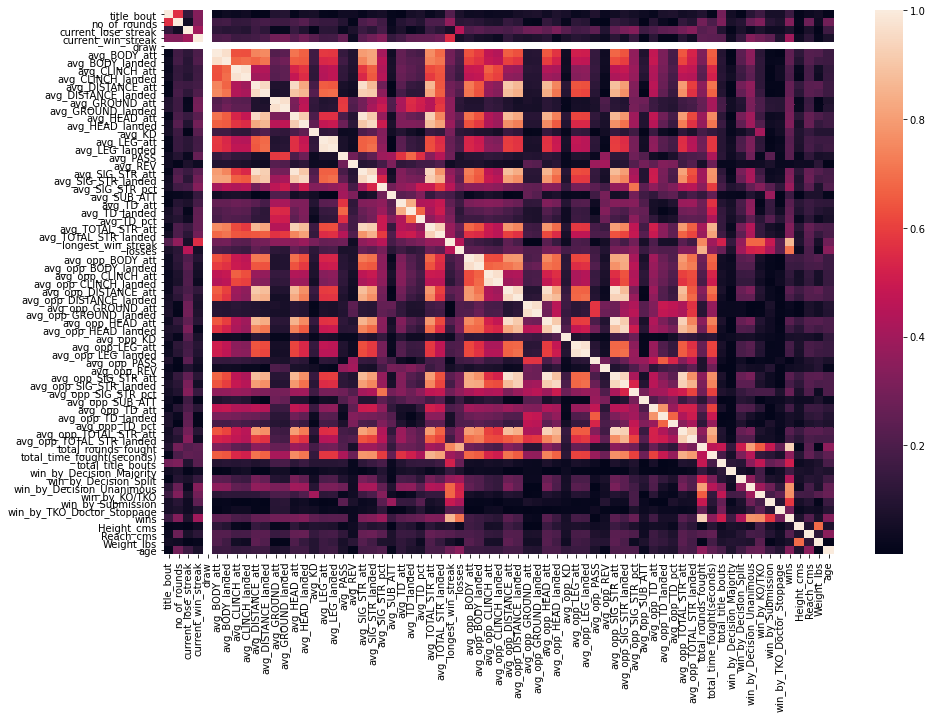

In [117]:
corr_matrix = fighter_data.corr(method = 'pearson').abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False)
      )
print("Top 10:\n", sol[0:10], "\nBottom 10:\n", sol[len(sol)-10:len(sol)])

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [12]:
#Mapping
#Setting up Dictionary for Mapping
winners_dict = {}
winners_dictR = {}

winners_dict_uni = df_features.Winner.unique()

print(winners_dict_uni)

for i in range(len(winners_dict_uni)):
    winners_dict[i] = winners_dict_uni[i]
    winners_dictR[winners_dict_uni[i]] = i
print(winners_dictR)

df_features['WinnerNumber'] = df_features['Winner']
df_features['WinnerNumber'] = df_features['WinnerNumber'].map(winners_dictR)
#print(df_features.WinnerNumber)

df_features.WinnerNumber.head()

['Red' 'Blue' 'Draw']
{'Red': 0, 'Blue': 1, 'Draw': 2}


C:\Users\chappie\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\chappie\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    0
1    0
2    0
3    1
4    1
Name: WinnerNumber, dtype: int64

In [13]:
#Getting rid of draws
df_features = df_features[df_features.WinnerNumber != 2]

In [14]:
#df_features = df_features.apply (pd.to_numeric, errors='coerce')
df_features = df_features.dropna()
#df_features = df_features.reset_index(drop=True)
df_features.head(10)

,Winner,B_fighter,R_fighter,no_of_rounds,weight_class,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,WinnerNumber
0,Red,Marlon Moraes,Henry Cejudo,5,Bantamweight,0.200000,0.000000,2.600000,48.600000,11.200000,7.600000,5.400000,66.400000,23.600000,17.000000,11.000000,9.400000,74.200000,23.900000,5.300000,3.700000,129.900000,69.100000,0
1,Red,Jessica Eye,Valentina Shevchenko,5,Women's Flyweight,11.800000,7.300000,2.400000,112.000000,32.000000,12.300000,10.200000,158.700000,69.600000,9.285714,6.857143,18.428571,84.571429,37.000000,19.285714,14.714286,161.571429,102.857143,0
2,Red,Donald Cerrone,Tony Ferguson,3,Lightweight,6.741935,4.387097,5.516129,67.645161,23.258065,14.000000,12.193548,103.709677,52.548387,2.866667,1.733333,5.333333,96.733333,35.600000,13.733333,11.200000,133.000000,63.400000,0
3,Blue,Petr Yan,Jimmie Rivera,3,Bantamweight,13.750000,11.000000,13.000000,116.250000,53.750000,3.000000,2.500000,154.750000,86.750000,5.875000,4.125000,1.000000,80.500000,24.000000,13.000000,11.500000,117.375000,50.750000,1
4,Blue,Blagoy Ivanov,Tai Tuivasa,3,Heavyweight,2.500000,2.000000,0.000000,184.500000,45.000000,2.000000,2.000000,204.000000,62.000000,11.000000,7.250000,0.500000,50.750000,22.750000,3.750000,3.000000,63.500000,32.750000,1
5,Red,Nina Ansaroff,Tatiana Suarez,3,Women's Strawweight,11.833333,7.166667,6.000000,117.833333,42.666667,22.833333,20.166667,183.500000,95.666667,3.000000,2.250000,42.250000,44.750000,31.250000,4.500000,4.000000,101.500000,80.500000,0
6,Red,Pedro Munhoz,Aljamain Sterling,3,Bantamweight,6.083333,3.416667,5.083333,66.583333,24.000000,14.500000,10.083333,102.666667,47.500000,14.000000,11.083333,16.083333,63.000000,23.333333,14.500000,10.666667,138.333333,85.750000,0
7,Blue,Alexa Grasso,Karolina Kowalkiewicz,3,Women's Strawweight,17.500000,11.250000,3.000000,94.250000,29.750000,15.750000,13.000000,165.500000,87.500000,27.555556,20.777778,3.777778,149.000000,46.777778,12.888889,9.222222,211.222222,95.000000,1
8,Blue,Calvin Kattar,Ricardo Lamas,3,Featherweight,1.750000,0.500000,8.750000,122.250000,46.500000,6.000000,5.000000,139.250000,59.000000,7.200000,6.400000,6.933333,45.933333,15.266667,14.133333,10.266667,80.000000,43.533333,1
9,Red,Angela Hill,Yan Xiaonan,3,Women's Strawweight,22.500000,16.800000,2.600000,108.300000,45.300000,12.500000,11.100000,159.000000,85.800000,10.666667,7.333333,1.333333,213.666667,79.000000,33.333333,21.333333,260.666667,109.000000,0


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [16]:
X = df_features.drop(['Winner', 'weight_class','B_fighter','R_fighter','WinnerNumber'], axis=1)
y = df_features['WinnerNumber']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [17]:
print(X)

      no_of_rounds  B_avg_CLINCH_att  B_avg_CLINCH_landed  B_avg_GROUND_att  \
0                5          0.200000             0.000000          2.600000   
1                5         11.800000             7.300000          2.400000   
2                3          6.741935             4.387097          5.516129   
3                3         13.750000            11.000000         13.000000   
4                3          2.500000             2.000000          0.000000   
...            ...               ...                  ...               ...   
5125             1          0.000000             0.000000          9.000000   
5127             1          1.000000             1.000000          0.000000   
5136             1          0.000000             0.000000          5.500000   
5138             1          0.000000             0.000000          1.000000   
5139             1          9.000000             4.000000          8.000000   

      B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_LEG_

In [18]:
#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_train)

Logistic Regression Accuracy Score is: 0.3273942093541203
   0    1
0  3  604
1  0  291





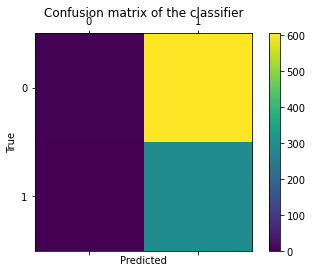

In [19]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
clf = LR.fit(X_scaled, y_train)
y_predict = clf.predict(X_test)
print('Logistic Regression Accuracy Score is:', accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree Classifier Accuracy Score is 0.38752783964365256
    0    1
0  89  518
1  32  259





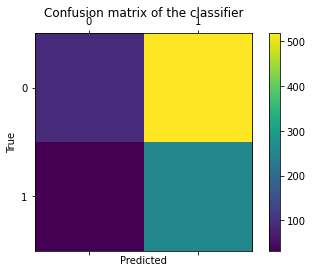

In [20]:
DTC = DecisionTreeClassifier()
DTCfit = DTC.fit(X_scaled, y_train)
y_predict = DTCfit.predict(X_test)
print('Decision Tree Classifier Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Random Forest Classifier Accuracy Score is 0.6592427616926503
     0   1
0  589  18
1  288   3





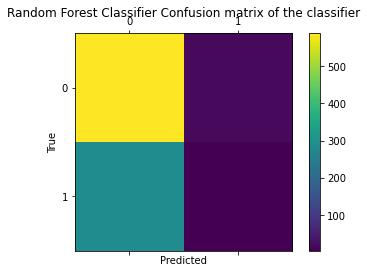

In [21]:
RFC = RandomForestClassifier(n_estimators=50)
RFCfit = RFC.fit(X_scaled, y_train)
y_predict = RFCfit.predict(X_test)
print('Random Forest Classifier Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Random Forest Classifier Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
#Create a series with feature importances:
trainingKeys = X.columns
featureI = pd.Series(RFC.feature_importances_, index=trainingKeys).sort_values(ascending=False)
print(featureI)
featureI = featureI[featureI > 0.05]
print(featureI)

B_avg_HEAD_att            0.065727
B_avg_HEAD_landed         0.064545
R_avg_GROUND_att          0.064362
B_avg_TOTAL_STR_att       0.061251
R_avg_HEAD_att            0.056876
B_avg_GROUND_att          0.056816
B_avg_TOTAL_STR_landed    0.055881
R_avg_HEAD_landed         0.055194
R_avg_TOTAL_STR_att       0.054687
R_avg_TOTAL_STR_landed    0.054472
R_avg_CLINCH_landed       0.053188
R_avg_CLINCH_att          0.052018
B_avg_LEG_landed          0.051112
R_avg_LEG_landed          0.050695
B_avg_LEG_att             0.050172
B_avg_CLINCH_att          0.050159
R_avg_LEG_att             0.048333
B_avg_CLINCH_landed       0.047599
no_of_rounds              0.006913
dtype: float64
B_avg_HEAD_att            0.065727
B_avg_HEAD_landed         0.064545
R_avg_GROUND_att          0.064362
B_avg_TOTAL_STR_att       0.061251
R_avg_HEAD_att            0.056876
B_avg_GROUND_att          0.056816
B_avg_TOTAL_STR_landed    0.055881
R_avg_HEAD_landed         0.055194
R_avg_TOTAL_STR_att       0.054687
R_avg

Accuracy Score is 0.6447661469933185
     0   1
0  532  75
1  244  47





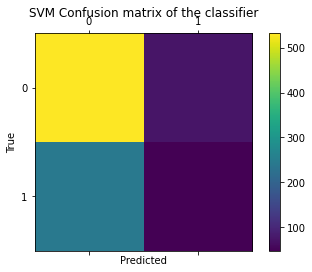

In [23]:
SVMmodel = svm.SVC(kernel='linear', C = 1)
SVMF = SVMmodel.fit(X_scaled, y_train)
y_predict = SVMF.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('\n\n')
# ---------------- #
cm = confusion_matrix(y_test, y_predict)
fig=plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('SVM Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#plt.plot(confusion_matrix(y_test,y_predict))

In [24]:
"""# Fit a linear regression model and store the predictions.
from sklearn.linear_model import LinearRegression

features_cols = ['B_avg_TOTAL_STR_att']

#X = df_features.drop(['Winner','B_fighter','R_fighter','weight_class'], axis=1)
X = df_features[features_cols]
y = df_features['WinnerNumber']
#X = dataX[features_cols]
#y = dataX['diagnosis_points']

linreg = LinearRegression()
linreg.fit(X, y)
df_features['winner_pred'] = linreg.predict(X) # prediction via Lin Reg-

# Scatter plot that includes the regression line
plt.scatter(df_features[features_cols], df_features['WinnerNumber'])
plt.plot(df_features[features_cols], df_features['winner_pred'], color='red')
plt.xlabel('')
plt.ylabel('Winner')
plt.savefig('test.png', dpi=400)
#----------------------

df_features['winner_pred_class'] = np.where(df_features['winner_pred'] >= 0.5, 1, 0)
df_features.head()

df_featuresX = df_features.sort_values(features_cols)

plt.scatter(df_featuresX[features_cols], df_featuresX['winner_pred'])

plt.xlabel('Total Attempted Strikes')
plt.ylabel('Winners Prediction')

plt.plot(df_featuresX[features_cols], df_features['winner_pred'], color='red');
plt.savefig('scatter_03_with_line_02.png', dpi=400)
#--------------------------
enc = LabelEncoder()
#-----------------------------
blue_winners = []
for i in range(len(df)):
    winner = df.loc[i,"Winner"]
    #print(winner)
    if winner == "Blue":
        blue_winners.append(df.loc[i])
        
droplist = ['date','location','title_bout','B_current_lose_streak','R_win_by_TKO_Doctor_Stoppage', 'B_current_win_streak']

df = df.drop(droplist2, axis = 1)
#----------------------------------------
for i in df.keys():
    print(i)

pd.set_option('display.max_rows', None)
df.head()

predf.head()

raw_fighter_details_pd.head()

raw_total_fight_pd.head()
"""

'# Fit a linear regression model and store the predictions.\nfrom sklearn.linear_model import LinearRegression\n\nfeatures_cols = [\'B_avg_TOTAL_STR_att\']\n\n#X = df_features.drop([\'Winner\',\'B_fighter\',\'R_fighter\',\'weight_class\'], axis=1)\nX = df_features[features_cols]\ny = df_features[\'WinnerNumber\']\n#X = dataX[features_cols]\n#y = dataX[\'diagnosis_points\']\n\nlinreg = LinearRegression()\nlinreg.fit(X, y)\ndf_features[\'winner_pred\'] = linreg.predict(X) # prediction via Lin Reg-\n\n# Scatter plot that includes the regression line\nplt.scatter(df_features[features_cols], df_features[\'WinnerNumber\'])\nplt.plot(df_features[features_cols], df_features[\'winner_pred\'], color=\'red\')\nplt.xlabel(\'\')\nplt.ylabel(\'Winner\')\nplt.savefig(\'test.png\', dpi=400)\n#----------------------\n\ndf_features[\'winner_pred_class\'] = np.where(df_features[\'winner_pred\'] >= 0.5, 1, 0)\ndf_features.head()\n\ndf_featuresX = df_features.sort_values(features_cols)\n\nplt.scatter(df_fe